#  NLP Sentiment Analysis Project 


## Group Member
1. Sharon Nyakeya
2. Priscillah Giriama
3. Fatuma Tari
4. Michelle Maina
5. Barclay Koin


# Business Objectives

### Goal: 
-Build a comprehensive sentiment analysis system for tech brand mentions on social media, built using the CRISP-DM methodology. This project classifies emotions (Positive/Negative/Neutral) toward brands like iPhone, iPad, Google, and various apps. 

1. Monitor brand sentiment

2. Detect crises early

3. Generate insights for marketing and product teams

### Success Criteria

1. Understand customer sentiment toward tech brands/products
2. Enable real-time sentiment monitoring
3. Provide actionable insights for brand management
3. Achieve >85% accuracy with F1-score >0.80

### Stakeholders

1. Marketing – monitors brand trends

2. Customer Support – identifies complaints

3. Product Team – understands feature feedback

### Constraints

1. Strong class imbalance

2. Limited labeled data (9,000 tweets)

3. Potential computational constraints (classical ML vs Transformer)

# Data Overview                               
## Data Source

*Source*: 9,093 real tweets rated by human experts

*Focus*: Tweets about iPhones, iPads, Android, Google services

*Quality*: Each tweet was reviewed and labeled by people for accuracy


## Data Understanding
Concrete steps
Inspect the CSV for columns and data types.

Confirm the target column name and classes. Typical columns: tweet_id, text, sentiment (values like positive/neutral/negative).

Run EDA: class distribution, length distribution, missing values, sample tweets.




# Explaratory Data Analysis

### Library Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

# Sklearn imports
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (classification_report, confusion_matrix, 
                             accuracy_score, f1_score, precision_score, recall_score)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from scipy.sparse import hstack

import joblib


### Loading Data
This code loads a CSV file using several different text encodings. 

file_path stores the name of the CSV file.

encodings is a list of common encodings to test.

The for loop reads the file with each encoding using pd.read_csv().

After loading successfully, it prints which encoding worked and stops the loop.

In [2]:
file_path = "judge-1377884607_tweet_product_company.csv"

encodings = ["latin1", "ISO-8859-1", "cp1252"]

for enc in encodings:
    try:
        df = pd.read_csv(file_path, encoding=enc)
        print(f"Loaded successfully with encoding: {enc}")
        break
    except Exception as e:
        print(f"Failed with {enc}: {e}")

Loaded successfully with encoding: latin1


A preview of the first five rows of the DataFrame to inspect the genral structure of the notebook

In [3]:
df.head() 

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Checking the column names in our DataFrame

In [4]:
df.shape 

(9093, 3)

Inspect the number of columns and rows in the DataFrame

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

To inspect the datatypes in our DataFrame.

In [6]:
df.head() #To inspect the datatypes in our DataFrame.

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Gives you a compact summary of our dataframe

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


### Check for duplicates DataFrame

Check for the sum of duplicates in our DataFrame

In [8]:
df.duplicated().sum() 

np.int64(22)

Check for the sum of duplicates in our DataFrame

In [9]:
df[df.duplicated()] 

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


### Drop duplicates
The duplicated values need to be dropped to avoid having a skewed analysis

In [10]:
df = df.drop_duplicates()

### Check for missing values

In [11]:
df.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5789
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

### Checking the percentange of the missing values

In [12]:
(df.isnull().sum() / len(df)) * 100

tweet_text                                             0.011024
emotion_in_tweet_is_directed_at                       63.818763
is_there_an_emotion_directed_at_a_brand_or_product     0.000000
dtype: float64

### Drop Column
Since our aim was to build an NLP model to analyze Twitter sentiment about Apple and Google products. The column:emotion_in_tweet_is_directed_at is deemed irrelevant to us.Hence we drop it and remain with tweet_tweet and is_there_an_emotion_directed_at_a_brand_or_product.The column:is_there_an_emotion_directed_at_a_brand_or_product is clean and has no missing values but the tweet_text has some missing values,let us fix that below.

In [13]:
#Dropping the irrelevant column to our task
df=df.drop(columns=['emotion_in_tweet_is_directed_at'])

### Drop missing values

In [14]:
df= df.dropna(subset=['tweet_text']) #drop the missing values in tweet_text.

In [15]:
#Confirming there are no missing values in our DataFrame
(df.isnull().sum() / len(df)) * 100

tweet_text                                            0.0
is_there_an_emotion_directed_at_a_brand_or_product    0.0
dtype: float64

Confirming the drop was successful

In [16]:
df.shape

(9070, 2)

## Data Visulization

### 1. Class Distribution
To check the distribution of our classes in our column:'is_there_an_emotion_directed_at_a_brand_or_product'

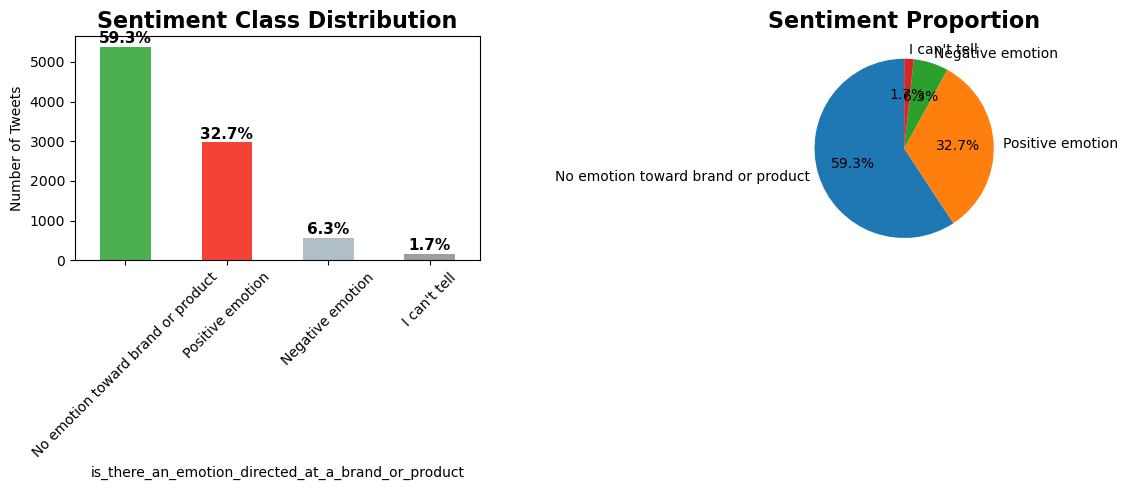

Class Distribution:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

Percentage:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    59.261
Positive emotion                      32.745
Negative emotion                       6.273
I can't tell                           1.720
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(12, 5))

# Use the same column for counts and percentages
col = 'is_there_an_emotion_directed_at_a_brand_or_product'

plt.subplot(1, 2, 1)
counts = df[col].value_counts()
percentages = df[col].value_counts(normalize=True) * 100

ax = counts.plot(kind='bar', color=['#4CAF50', '#F44336', '#B0BEC5', '#9E9E9E'])
plt.title('Sentiment Class Distribution', fontsize=16, fontweight='bold')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)

# Add percentage labels on bars
for i, (label, count) in enumerate(counts.items()):
    pct = percentages[label]
    ax.text(i, count + 100, f'{pct:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Proportion', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("Class Distribution:")
print(counts)
print("\nPercentage:")
print(percentages.round(3))


### 2. Tweet Length Distribution
Analysis of the tweet length in our data

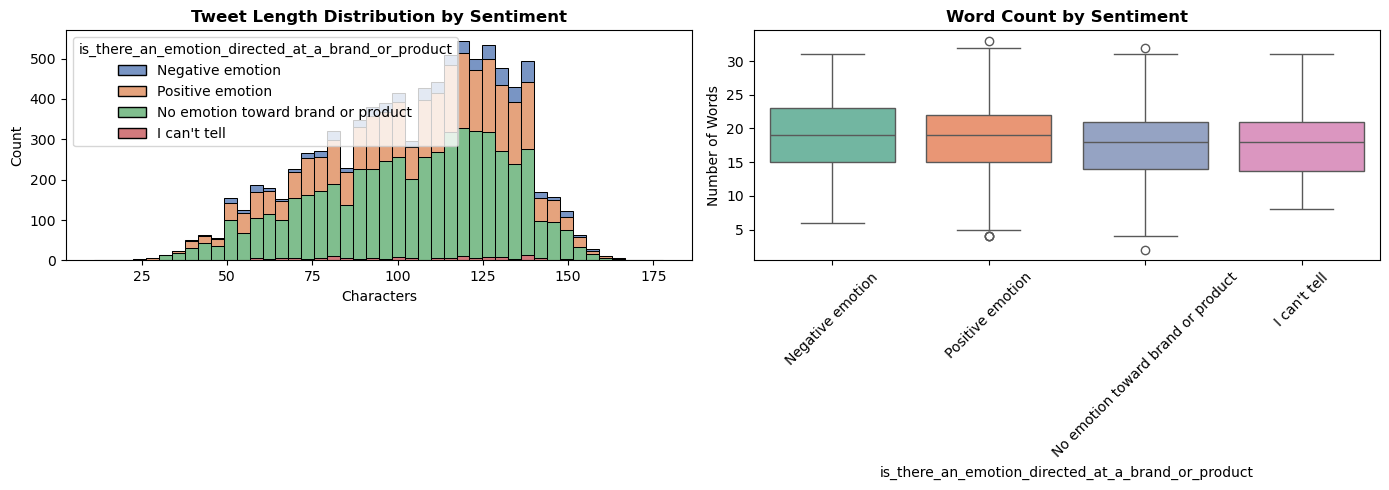

In [18]:
 #2. Tweet length analysis
    # 2. Tweet length analysis
df['tweet_length'] = df['tweet_text'].apply(len)
df['word_count'] = df['tweet_text'].apply(lambda x: len(x.split()))

sent_col = 'is_there_an_emotion_directed_at_a_brand_or_product'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram of tweet lengths by sentiment
sns.histplot(data=df, x='tweet_length', hue=sent_col, multiple='stack',
             ax=ax1, palette='deep')
ax1.set_title('Tweet Length Distribution by Sentiment', fontweight='bold')
ax1.set_xlabel('Characters')

# Boxplot of word count by sentiment
sns.boxplot(data=df, x=sent_col, y='word_count', ax=ax2, palette='Set2')
ax2.set_title('Word Count by Sentiment', fontweight='bold')
ax2.set_ylabel('Number of Words')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



### 3. Commonly Used Words Analysis
To find the most common words used in our dataset

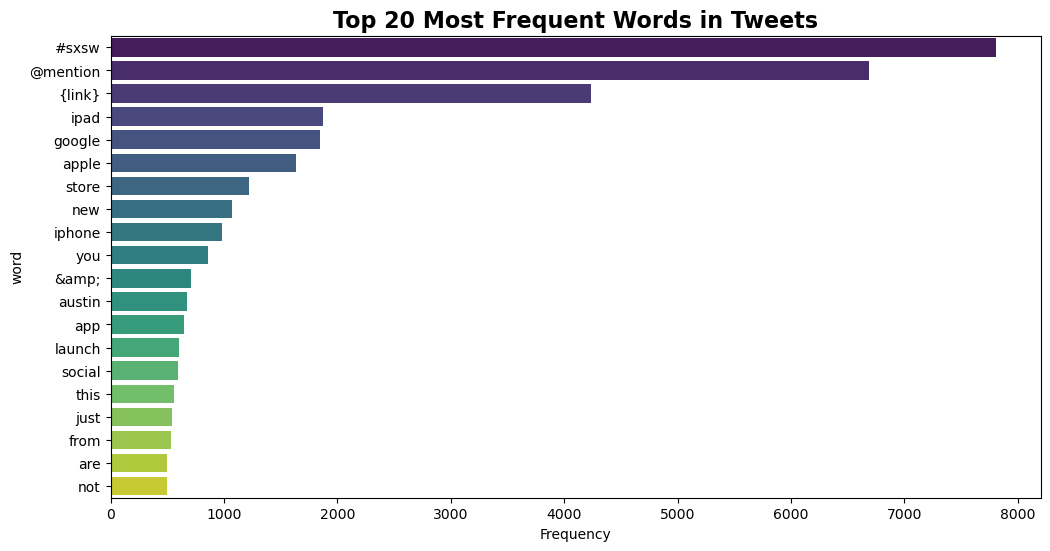

In [19]:
# Top 20 most common words overall
from collections import Counter
all_words = ' '.join(df['tweet_text']).lower()
words = [word for word in all_words.split() if len(word) > 2 and word not in ['the','and','for','that','with']]
common_words = Counter(words).most_common(20)

words_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(data=words_df, x='count', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Frequency')
plt.show()

# Data Preparation

## Data Cleaning, Advanced Data Preprocessing and Feature Engineering

Key preprocessing tailored for tweets

Lowercasing (optionally keep case for models that care).

Remove/normalize URLs, mentions (@username) and HTML entities.

Keep hashtags but optionally split #HappyBirthday → happy birthday.

Normalize elongated words (coooool → cool).

Handle emojis: map emojis to word tokens (emoji → :smile:) or use emoji embeddings.

Expand contractions (don't → do not) if using classic models.

Remove punctuation 

Handle language detection: filter to English 

## 1. Multiclass Classification
Focus on positive,negative and neutral sentiments

In [20]:
# ORIGINAL DISTRIBUTION (before any filtering)
print("\nOriginal class distribution (full dataset):")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts())
print("\nPercentages:")
print(df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True).round(3))

# CREATE A CLEAN 3-CLASS DATASET: Positive / Negative / Neutral
# We keep "I can't tell" → rename it to "Neutral"
# We remove only "No emotion toward brand or product" (truly no opinion)

df_model = df[
    df['is_there_an_emotion_directed_at_a_brand_or_product'] != 'No emotion toward brand or product'
].copy()

# Rename "I can't tell" → "Neutral" for clarity and better interpretation
df_model['is_there_an_emotion_directed_at_a_brand_or_product'] = df_model[
    'is_there_an_emotion_directed_at_a_brand_or_product'
].replace("I can't tell", "Neutral")

# Final check
print(f"\nFiltered & cleaned dataset size: {df_model.shape[0]:,} tweets")
print("\nFinal 3-class distribution:")
sentiment_counts = df_model['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print(sentiment_counts)

print("\nPercentages:")
print((sentiment_counts / len(df_model) * 100).round(2).astype(str) + "%")
   


Original class distribution (full dataset):
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

Percentages:
is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    0.593
Positive emotion                      0.327
Negative emotion                      0.063
I can't tell                          0.017
Name: proportion, dtype: float64

Filtered & cleaned dataset size: 3,695 tweets

Final 3-class distribution:
is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    2970
Negative emotion     569
Neutral              156
Name: count, dtype: int64

Percentages:
is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion    80.38%
Negative emotion     15.4%
Neutral              4.22%
Name: count, dtype: object


### 2. Data Cleaning / Adavanced Preprocessing
This preprocessing code takes raw tweets and turns them into clean, structured text that a machine learning model can use effectively, while preserving sentiment information.
The steps are:
Clean the text
Preprocess the text
Give an output with the cleaned text.

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
nltk.download('wordnet')

def advanced_clean_tweet(text):
    """
    Better cleaning that preserves sentiment information
    """
    # Lowercase
    text = text.lower()
    
    # Handle special cases before removing
    # Keep track of sentiment indicators
    text = re.sub(r':\)', ' positive_emoticon ', text)
    text = re.sub(r':\(', ' negative_emoticon ', text)
    text = re.sub(r':\)', ' neutral_emoticon ', text)
    text = re.sub(r'!+', ' exclamation ', text)  # Multiple exclamations
    
    # Remove URLs but keep the fact that a link was present
    text = re.sub(r'http\S+|www.\S+', ' url_present ', text)
    
    # Keep hashtag content (remove # but keep word)
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Remove mentions but track that they existed
    text = re.sub(r'@\w+', ' mention ', text)
    
    # Remove special characters except spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

def preprocess_text(text):
    """Advanced preprocessing with lemmatization"""
    # Tokenize
    tokens = word_tokenize(text)
    
    # Keep important words, remove stopwords, lemmatize
    # Don't remove ALL stopwords - keep negations like 'not', 'never', 'no'
    important_stopwords = {'not', 'no', 'never', 'neither', 'nor', 'nothing', 'nowhere'}
    stop_words_filtered = stop_words - important_stopwords
    
    tokens = [lemmatizer.lemmatize(word) for word in tokens 
              if word not in stop_words_filtered and len(word) > 2]
    
    return ' '.join(tokens)

print("\nApplying improved preprocessing...")
df_model['cleaned_text'] = df_model['tweet_text'].apply(advanced_clean_tweet)
df_model['processed_text'] = df_model['cleaned_text'].apply(preprocess_text)

print("\nExample:")
print("Original:", df_model['tweet_text'].iloc[0])
print("Processed:", df_model['processed_text'].iloc[0])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\GIRIAMA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Applying improved preprocessing...

Example:
Original: .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
Processed: mention iphone hr tweeting rise austin dead exclamation need upgrade plugin station sxsw


Inspect our columns

In [22]:
df_model.columns

Index(['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product',
       'tweet_length', 'word_count', 'cleaned_text', 'processed_text'],
      dtype='object')

A quick lookthrough to our dataset to see what we are dealing with.

In [23]:
df_model.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count,cleaned_text,processed_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,23,mention i have a g iphone after hrs tweeting a...,mention iphone hr tweeting rise austin dead ex...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,22,mention know about mention awesome ipad iphone...,mention know mention awesome ipad iphone app l...
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,15,mention can not wait for ipad also they should...,mention not wait ipad also sale sxsw
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,15,mention i hope this year s festival isn t as c...,mention hope year festival crashy year iphone ...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,17,mention great stuff on fri sxsw marissa mayer ...,mention great stuff fri sxsw marissa mayer goo...


## Clean Data Visulization

###  Worldcloud for most Common Words
After preprocessing, it’s helpful to visualize the most frequent words in the dataset. A WordCloud provides an intuitive way to see which words appear most often in the cleaned and processed tweets.

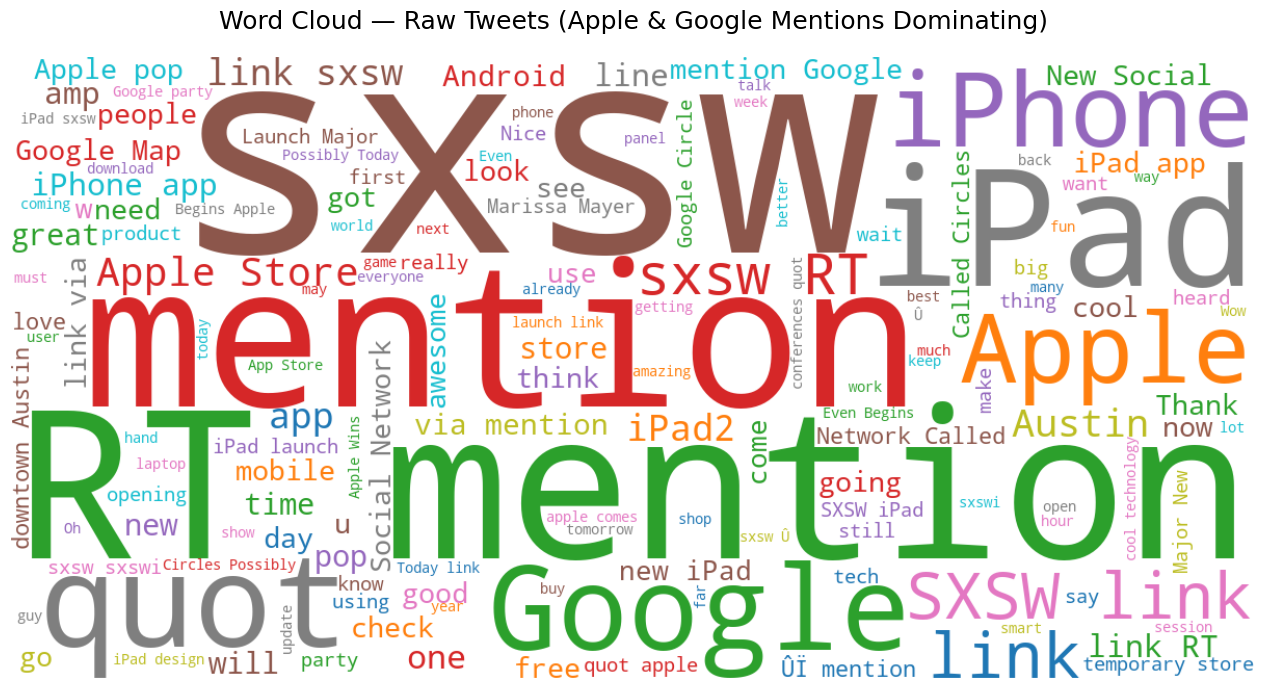

In [24]:
# INSTALL + IMPORT WORDCLOUD (run this once)
!pip install wordcloud -q

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Make sure we use the right DataFrame
assert 'df_model' in globals(), "df_model not found! Run the filtering cell first."

# WordCloud from RAW tweets (still useful for presentation)
text_raw = " ".join(df_model['tweet_text'].astype(str))

wordcloud_raw = WordCloud(
    width=1200, height=600,
    background_color='white',
    colormap='tab10',
    max_words=150,
    contour_width=1,
    contour_color='steelblue'
).generate(text_raw)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_raw, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud — Raw Tweets (Apple & Google Mentions Dominating)', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

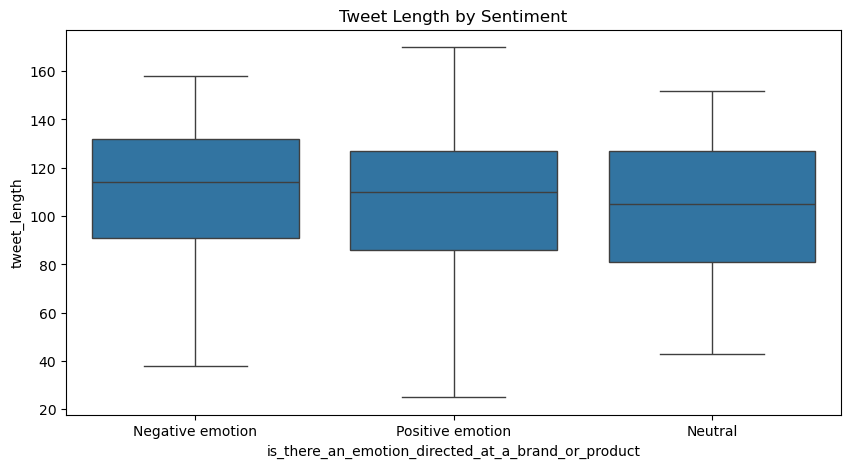

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='is_there_an_emotion_directed_at_a_brand_or_product', y='tweet_length', data=df_model)
plt.title("Tweet Length by Sentiment")
plt.show()


### d. Label  Encoding
In the dataset, sentiment labels are mapped to numeric values for use in machine learning models. This is necessary because most algorithms cannot work directly with string labels.

In [26]:
le = LabelEncoder()
df_model['sentiment'] = le.fit_transform(df_model['is_there_an_emotion_directed_at_a_brand_or_product'])

print(f"\nLabel mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")


Label mapping: {'Negative emotion': np.int64(0), 'Neutral': np.int64(1), 'Positive emotion': np.int64(2)}


Renaming the tokenized tweet to cleaned tweet

In [27]:
#rename column
df_model.rename(columns={'tokenized_tweet': 'cleaned_tweet'}, inplace=True)

In [28]:
df_model.shape

(3695, 7)

In [29]:
df_model.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length,word_count,cleaned_text,processed_text,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,127,23,mention i have a g iphone after hrs tweeting a...,mention iphone hr tweeting rise austin dead ex...,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,139,22,mention know about mention awesome ipad iphone...,mention know mention awesome ipad iphone app l...,2
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,79,15,mention can not wait for ipad also they should...,mention not wait ipad also sale sxsw,2
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,82,15,mention i hope this year s festival isn t as c...,mention hope year festival crashy year iphone ...,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,131,17,mention great stuff on fri sxsw marissa mayer ...,mention great stuff fri sxsw marissa mayer goo...,2


## 4. Feature Engineering

Using both cleaned_tweet and tweet_text to help us capture word-based and punctuation-based signals.

These features are especially helpful for classical ML models 

In [30]:
def extract_sentiment_features(row):
    """Extract sentiment-specific features"""
    text = row['tweet_text']
    
    features = {}
    
    # Punctuation features
    features['exclamation_count'] = text.count('!')
    features['question_count'] = text.count('?')
    features['dots_count'] = text.count('...')
    
    # Text statistics
    features['word_count'] = len(text.split())
    features['char_count'] = len(text)
    features['avg_word_length'] = features['char_count'] / (features['word_count'] + 1)
    
    # Capitalization (shows emphasis/shouting)
    features['capital_ratio'] = sum(1 for c in text if c.isupper()) / (len(text) + 1)
    features['has_all_caps'] = int(any(word.isupper() and len(word) > 2 for word in text.split()))
    
    # Positive/Negative word indicators
    positive_words = ['love', 'great', 'awesome', 'amazing', 'excellent', 'perfect', 
                     'best', 'good', 'wonderful', 'fantastic', 'happy']
    negative_words = ['hate', 'terrible', 'awful', 'worst', 'bad', 'poor', 'disappointing',
                     'disappointed', 'frustrating', 'annoying', 'useless', 'broken', 'crash']
    
    text_lower = text.lower()
    features['positive_word_count'] = sum(word in text_lower for word in positive_words)
    features['negative_word_count'] = sum(word in text_lower for word in negative_words)
    
    # Sentiment ratio
    total_sentiment_words = features['positive_word_count'] + features['negative_word_count']
    if total_sentiment_words > 0:
        features['sentiment_ratio'] = features['positive_word_count'] / total_sentiment_words
    else:
        features['sentiment_ratio'] = 0.5
    
    return pd.Series(features)

print("Extracting sentiment features...")
feature_df = df_model.apply(extract_sentiment_features, axis=1)
df_model = pd.concat([df_model, feature_df], axis=1)

print("\nExtracted features:")
print(feature_df.columns.tolist())
print("\nFeature statistics:")
print(feature_df.describe())

Extracting sentiment features...

Extracted features:
['exclamation_count', 'question_count', 'dots_count', 'word_count', 'char_count', 'avg_word_length', 'capital_ratio', 'has_all_caps', 'positive_word_count', 'negative_word_count', 'sentiment_ratio']

Feature statistics:
       exclamation_count  question_count   dots_count   word_count  \
count        3695.000000     3695.000000  3695.000000  3695.000000   
mean            0.372936        0.135589     0.075507    18.241407   
std             0.784268        0.417235     0.285895     4.964647   
min             0.000000        0.000000     0.000000     4.000000   
25%             0.000000        0.000000     0.000000    15.000000   
50%             0.000000        0.000000     0.000000    19.000000   
75%             1.000000        0.000000     0.000000    22.000000   
max             9.000000        4.000000     3.000000    33.000000   

        char_count  avg_word_length  capital_ratio  has_all_caps  \
count  3695.000000      369